In [5]:
pwd

'/home/wsuser/work'

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_91b64211c7184f488076429199be3e00 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='02q3Knbtv2aYi4X4wRN9ojHfgO41uNCR_fsGA5Y_TrfT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_91b64211c7184f488076429199be3e00.get_object(Bucket='animalclassificationcnn-donotdelete-pr-rx7domolzumhbv', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [2]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()), 'r')
file_path = unzip.namelist()
for path in file_path:
    unzip.extract(path)

In [4]:
ls -1

dataset/


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False)

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
ls

dataset/


In [11]:
cd /home/wsuser/work/dataset

/home/wsuser/work/dataset


In [12]:
ls

Testing/  Training/


In [15]:
x_train = train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Training", target_size = (64,64), class_mode = 'categorical', batch_size = 24)

Found 1238 images belonging to 4 classes.


In [16]:
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Testing", target_size = (64,64), class_mode = 'categorical', batch_size = 24)

Found 326 images belonging to 4 classes.


In [17]:
len(x_test)

14

In [18]:
326/24

13.583333333333334

In [19]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# CNN 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [21]:
model = Sequential()

In [22]:
model.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [23]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.fit_generator(x_train, steps_per_epoch = len(x_train), epochs = 10, validation_data = x_test, validation_steps = len(x_test))

/tmp/wsuser/ipykernel_164/3944985481.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch = len(x_train), epochs = 10, validation_data = x_test, validation_steps = len(x_test))


Epoch 1/10
52/52 [==============================] - 14s 246ms/step - loss: 1.4741 - accuracy: 0.4192 - val_loss: 1.0769 - val_accuracy: 0.5521
Epoch 2/10
52/52 [==============================] - 12s 236ms/step - loss: 0.8844 - accuracy: 0.6300 - val_loss: 0.7884 - val_accuracy: 0.7147
Epoch 3/10
52/52 [==============================] - 12s 236ms/step - loss: 0.7616 - accuracy: 0.7036 - val_loss: 0.7636 - val_accuracy: 0.7147
Epoch 4/10
52/52 [==============================] - 12s 237ms/step - loss: 0.6734 - accuracy: 0.7464 - val_loss: 0.4804 - val_accuracy: 0.8067
Epoch 5/10
52/52 [==============================] - 12s 235ms/step - loss: 0.5812 - accuracy: 0.7811 - val_loss: 0.4848 - val_accuracy: 0.8221
Epoch 6/10
52/52 [==============================] - 12s 236ms/step - loss: 0.5042 - accuracy: 0.8061 - val_loss: 0.5358 - val_accuracy: 0.8190
Epoch 7/10
52/52 [==============================] - 12s 237ms/step - loss: 0.4682 - accuracy: 0.8320 - val_loss: 0.3571 - val_accuracy: 0.8589

In [29]:
model.save('animal.h5')

# Test Model

In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model = load_model('animal.h5')

In [37]:
img = image.load_img(r"/home/wsuser/work/dataset/Testing/elephants/images (43).jpeg", target_size = (64, 64))

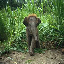

In [38]:
img

In [39]:
x = image.img_to_array(img)

In [40]:
x

array([[[ 40.,  60.,  51.],
        [ 35.,  55.,  46.],
        [ 16.,  36.,  27.],
        ...,
        [ 70., 112.,  48.],
        [ 60., 101.,  45.],
        [ 68., 105.,  61.]],

       [[  9.,  29.,  20.],
        [ 21.,  41.,  32.],
        [ 67.,  87.,  78.],
        ...,
        [ 66., 108.,  44.],
        [ 58.,  99.,  43.],
        [ 81., 117.,  79.]],

       [[ 16.,  36.,  25.],
        [ 34.,  54.,  43.],
        [ 29.,  49.,  38.],
        ...,
        [ 44.,  86.,  22.],
        [ 51.,  91.,  39.],
        [119., 157., 106.]],

       ...,

       [[103.,  99.,  88.],
        [102.,  99.,  84.],
        [115., 112.,  95.],
        ...,
        [113., 110.,  93.],
        [123., 121., 106.],
        [129., 124., 105.]],

       [[ 54.,  49.,  45.],
        [ 53.,  48.,  42.],
        [ 83.,  79.,  70.],
        ...,
        [129., 123., 109.],
        [107., 103.,  91.],
        [109., 104.,  85.]],

       [[ 61.,  69.,  56.],
        [ 76.,  81.,  75.],
        [ 92.,  

In [41]:
x.ndim

3

In [42]:
x = np.expand_dims(x, axis = 0)

In [44]:
x.ndim

4

In [46]:
pred = np.argmax(model.predict(x), axis = 1)

In [47]:
pred

array([2])

In [48]:
index = ['bears', 'crows', 'elephants', 'rats']

In [49]:
index[pred[0]]

'elephants'

In [53]:
img = image.load_img(r"/home/wsuser/work/dataset/Testing/crows/Z1 (31).jpeg", target_size = (64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis = 1)
index[pred[0]]

FileNotFoundError: [Errno 2] No such file or directory: '/home/wsuser/work/dataset/Testing/crows/Z1 (31).jpeg'